# EtaZero Demo
This notebook is a demonstration of my dissertation project and its reproducibility. EtaZero is an AlphaZero-style AI trained to play the game [Sevn](https://apps.apple.com/us/app/sevn/id1179097907).

The project repository contains an implementation of the game, EtaZero's algorithm, trained neural network instances (which are used in the algorithm) and evaluation tools.

First let's clone the project and install some dependancies.

In [ ]:
!pip install dgl
!pip install pygame
!pip install portalocker
!git clone https://github.com/mahclark/EtaZero.git

     |████████████████████████████████| 4.4MB 7.2MB/s 
     |████████████████████████████████| 11.8MB 251kB/s 
Cloning into 'EtaZero'...
remote: Enumerating objects: 1273, done.
remote: Counting objects: 100% (571/571), done.
remote: Compressing objects: 100% (326/326), done.
remote: Total 1273 (delta 305), reused 484 (delta 231), pack-reused 702
Receiving objects: 100% (1273/1273), 121.95 MiB | 23.42 MiB/s, done.
Resolving deltas: 100% (597/597), done.
Checking out files: 100% (514/514), done.


In [ ]:
import sys
base_path = "EtaZero/src"
section = "Attempt7"
sys.path.append(base_path)

In [ ]:
from evaluation.arena import Arena
from agents.eta_zero import EtaZero
from agents.network_agent import RawNetwork
from agents.random_agent import RandomAgent
from utils import load_net

pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


Let's show we have access to the repo by plotting the progress chart of EtaZero. Each point on the line shows the Elo rating of a trained instance of EtaZero.

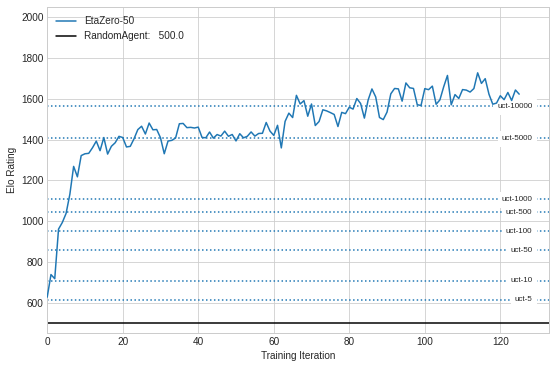

In [ ]:
arena = Arena(base_path, section)
arena.plot_all(custom_ids=[])

Now let's evaluate a new agent: *RawNetwork*

This agent uses a neural network to make decisions immediately without tree-search.

We load a pre-trained neural network and instantiate the agent.

In [ ]:
net = load_net(114, base_path, section)
raw_network = RawNetwork(net)

Now let's battle our RawNetwork against an agent which randomly selects moves. If the neural network we chose is any good, it should beat the random agent almost all the time.

In [ ]:
arena.battle(
    raw_network,
    RandomAgent(),
    game_pairs=20
)

40 games Raw-PolicyValRGCN-114-2021-03-26-07-31-12 vs Random Agent (fixed):
 0% + + + + won 4 of 4
10% + + + + won 8 of 8
20% + + + + won 12 of 12
30% + + + + won 16 of 16
40% + + + + won 20 of 20
50% + + + + won 24 of 24
60% + + + + won 28 of 28
70% + + + + won 32 of 32
80% + + + + won 36 of 36
90% + + + + won 40 of 40
100%
Won 40 of 40
New elo: 1140.8 (history = {'Random Agent': [40, 41]})


Now let's battle our RawNetwork against an EtaZero instance. Because EtaZero uses the neural network in conjunction with tree search, we expect the RawNetwork to lose most games.

Since EtaZero requires time to search the tree, this battle takes slightly longer.

In [ ]:
arena.battle(
    raw_network,
    EtaZero(net, samples_per_move=50),
    game_pairs=5
)

10 games Raw-PolicyValRGCN-114-2021-03-26-07-31-12 vs EtaZero-50-PolicyValRGCN-114-2021-03-26-07-31-12 (fixed):
 0% - - won 0 of 2
20% - - won 0 of 4
40% + - won 1 of 6
60% - - won 1 of 8
80% - - won 1 of 10
100%
Won 1 of 10
New elo: 1181.1 (history = {'Random Agent': [40, 41], 'EtaZero-50-PolicyValRGCN-114-2021-03-26-07-31-12': [1, 10]})


Now that it has played some games, we can see an Elo rating was automatically calculated. To compare the rating to other agents, let's replot the progress graph, specifying that we want to include the RawNetwork.

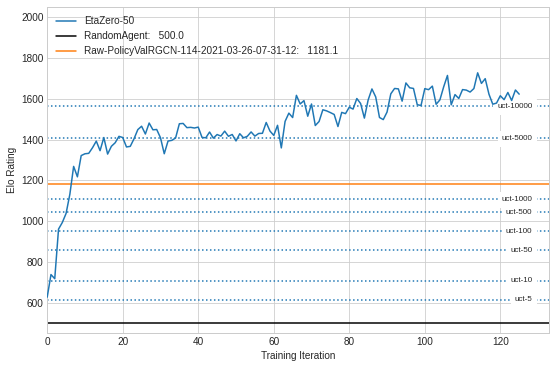

In [ ]:
arena.plot_all(custom_ids=[raw_network.elo_id])